## Telling a Story about Exchange Rates with Data Visualization

This project will explore explore exchange rates at various point of time dating back to 1999 all the way up to 2021. I'll be exploring the relationships between the euro (symbolized with €) and the dollar (symbolized with $). 

Some things to highlight before we start:
* If the exchange rate of the euro the US dollar is 1.5, it means that you get 1.5 IS dollars if you pay 1.0 euro (one euro has more value than one US dollar at this exchange rate). 
* The data can be found on [Kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020). Daria Chemkaeva put together the data set and made it available. The data source is the European Central Bank. Note that the dataset gets regular updates — we downloaded it on January 2021.

In [21]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# Pull in data
exchange_rates = pd.read_csv("euro-daily-hist_1999_2020.csv")

In [22]:
# Checking the top 5 rows of exchange_rates
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [23]:
# Checking the bottom 5 rows of exchange_rates
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [24]:
# Checking Additional Information about the dataset
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

### Initial Observations
- There are 5,699 rows and 40 columns. Each column represents a unique currency. 
- There are null values for the following currencies:
    - Bulgarian lev, Brazilian real, Chinese yuan renminbi, Cypriot pound, Estonian kroon, Greek drachma, Croatian kuna, Israeli shekel, Indian rupee, Iceland krona, Lithuanian litas, Latvian lats, Maltese lira, Romanian leu, Slovenian tolar, Slovak koruna, Turkish lira.
- Most of the columns are of the object type. 

### Data cleaning

The focus of the project will be on the exchange rate between the euro and the American dollar. 

1. First, we'll have to rename the `[US dollar ]` and `Period\Unit:` columns to something easier to work with the data. For example, `US_dollar` and `Time`. 
2. Then, I'll change the time column to a datetime data type. 
3. Sort the values by time in ascending order. 
4. Reset the index and drop the initial index

In [25]:
# Change the names of the columns
exchange_rates.rename(columns = {'[US dollar ]':
                                'US_dollar',
                                'Period\\Unit:': 'Time'},
                     inplace = True)
# Change the time column to a datetime object
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])

# Sort the values by `Time` in ascending order
exchange_rates.sort_values('Time', inplace = True)

# reset the index and drop the initial index
exchange_rates.reset_index(drop = True, inplace = True)
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [26]:
# Isolate the Time and US-Dollar columns
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()

In [27]:
# Run Value Counts method to observe results
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1268     6
          ..
1.3117     1
1.3827     1
0.8964     1
1.1070     1
1.4586     1
Name: US_dollar, Length: 3528, dtype: int64

 Looking at the data above we have two columns where there is '-' which I believe signifies a negative value. We're not interested in that kind of data. We need to drop these rows. 

In [31]:
# Drops rows where the - character appears in the US_dollar column

euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']

# Convert US_dollar column to float datatype since it's a numerical with float values
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

# Check this information
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


/dataquest/system/env/python3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



It looks as though time and US_dollar are the type we want them to be for now. 

### Exploratory Data Analysis

Now that we've cleaned the data, I'm going to generate a line plot to visualize the how the euro and US dollar have interacted over time. 

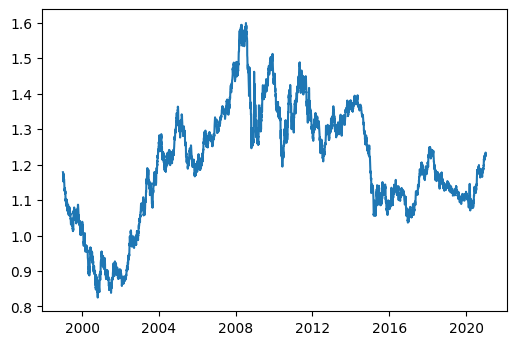

In [33]:
# Import Matplotlib
import matplotlib.pyplot as plt

# Enables Jupyter notebooks to display graphs. 
%matplotlib inline

plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

The graph above shows daily trends which makes for a lot of variation and a lot of reading. A lot of companies operate on the basis of quarters or years so we'll use a **rolling mean** to determine the moving average over time. This is the value on a day to day basis from the current daily mean and the previous days' mean. 


Text(0.5, 1.0, 'Original Values')

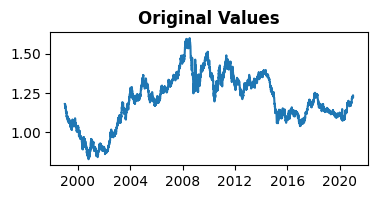

In [37]:

# Creates a figure
plt.figure(figsize = (9, 6))

# Creates a subplot
plt.subplot(3, 2, 1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original Values', weight = 'bold')


Next, I'm going to calculate the rolling mean using different windows (1 week, 1 month, 50 days, 100 days, and one year).

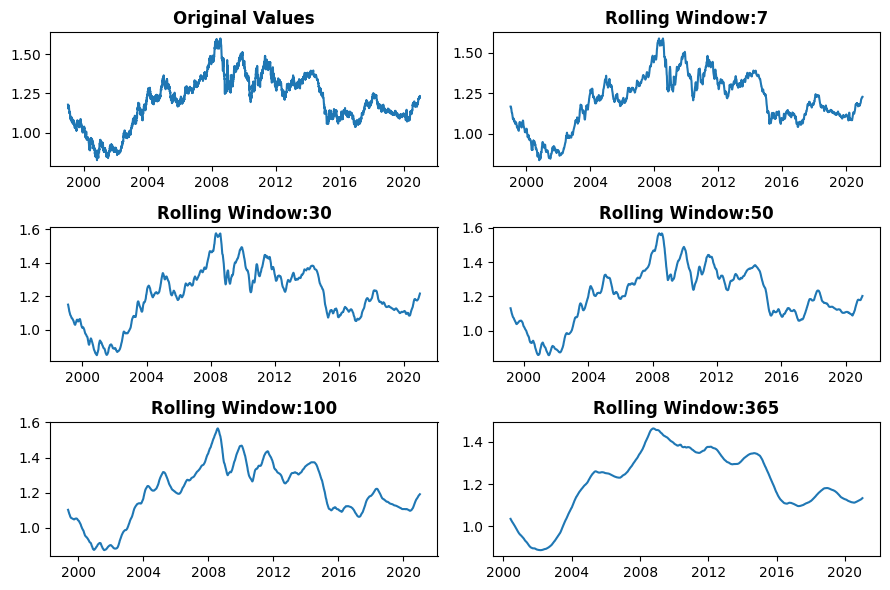

In [39]:
# Creates a figure
plt.figure(figsize = (9, 6))

# Creates a subplot
plt.subplot(3, 2, 1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original Values', weight = 'bold')


# For loop to perform the operation above multiple times for different rolling means.

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                          [7, 30, 50, 100, 365]):
    plt.subplot(3, 2, i)
    plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight = 'bold')
              
plt.tight_layout()
plt.show()

In [40]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357


### Telling A Story with the Data
We're going to tell a few stories using the data:

- Show how the euro_dollar rate changed during the 2007-2008 financial crisis
- Show the comparison between euro_dollar rates during the George Bush, Barack Obama, and Donald Trump presidencies. 
- Show how the euro-dollar rate has changed over the course of the pandemic

### Visualizing the Financial Crisis of 2007-2008

In [87]:
# Isolating time period of data we want
financial_crisis = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2004)
                                         & (euro_to_dollar['Time'].dt.year <= 2009)]

# Isolating financial crisis year 2007-2008
financial_crisis_7_8 = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2007)
                                            & (euro_to_dollar['Time'].dt.year <= 2008)]

# Isolating Economic recovery
economic_recovery = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2009)
                                         & (euro_to_dollar['Time'].dt.year < 2011)]


In [46]:
# Checking the data frames
financial_crisis.head(10)

,Time,US_dollar,rolling_mean
1304,2004-01-02,1.2592,1.218737
1305,2004-01-05,1.2657,1.221227
1306,2004-01-06,1.2756,1.224050
1307,2004-01-07,1.2679,1.226650
1308,2004-01-08,1.2634,1.229353
1309,2004-01-09,1.2737,1.232590
1310,2004-01-12,1.2828,1.235923
1311,2004-01-13,1.2749,1.238747
1312,2004-01-14,1.2692,1.241073
1313,2004-01-15,1.2635,1.243127


In [49]:
financial_crisis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1538 entries, 1304 to 2868
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Time          1538 non-null   datetime64[ns]
 1   US_dollar     1538 non-null   float64       
 2   rolling_mean  1538 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 48.1 KB


In [48]:
financial_crisis_7_8.head()

,Time,US_dollar,rolling_mean
2086,2007-01-02,1.3270,1.314257
2087,2007-01-03,1.3231,1.315780
2088,2007-01-04,1.3106,1.316663
2089,2007-01-05,1.3084,1.317563
2090,2007-01-08,1.3006,1.317963


In [54]:
financial_crisis_7_8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 2086 to 2607
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Time          511 non-null    datetime64[ns]
 1   US_dollar     511 non-null    float64       
 2   rolling_mean  511 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 16.0 KB


### Observations

It looks like the information was pulled in correctly. Now we'll start building the plots. 

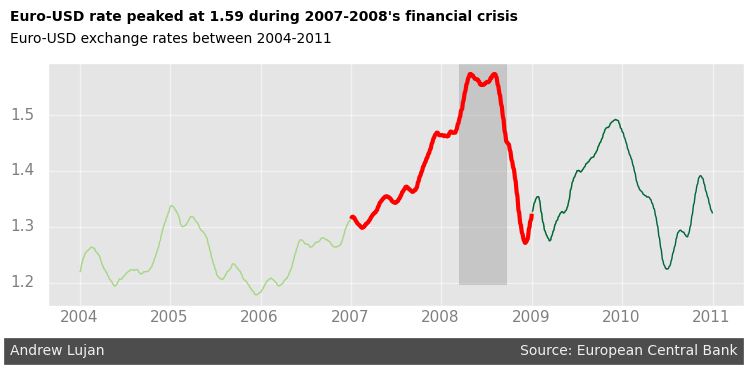

In [136]:
### Adding the ggplot style
import matplotlib.style as style
style.use('ggplot')

# Adding the plot
fig, ax = plt.subplots(figsize = (8, 3))

ax.plot(financial_crisis['Time'],
       financial_crisis['rolling_mean'],
       linewidth = 1, color = '#A6D785')

# Highlighting the 2007-2008 Period
ax.plot(financial_crisis_7_8['Time'],
       financial_crisis_7_8['rolling_mean'],
        linewidth = 3, color = '#FF0000')

# Highlighting start of economic recover
ax.plot(economic_recovery['Time'],
       economic_recovery['rolling_mean'],
       linewidth = 1, color = '#00643F')

#Highlighting the Peak of the financial crisis
ax.axvspan(xmin = 733112.0, xmax = 733302.0, ymin = 0.09,
          alpha = .3, color = 'grey')

## Adding tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

x = 731500.0
for year in ['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011']:
    ax.text(x, 1.13, year, alpha=0.5, fontsize=11)
    x += 365

y = 1.193
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(731300, y, rate, alpha = 0.5, fontsize = 11)
    y += 0.1
    
# Adding a title and subtitles
ax.text(731300, 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
       weight = "bold")
ax.text(731300, 1.63, 'Euro-USD exchange rates between 2004-2011')

# Adding a signature
ax.text(731300, 1.07, "Andrew Lujan" + ' '*95 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)

# Remove the grid
ax.grid(alpha = 0.5)


    

### Observations
- The euro-usd rate peaked during the time period from 2008-2009 at a value of 1.59. 
- There was a period of recession through early 2009 with some recovery occuring later that year. However, there was another big dip in early 2010. 

### Looking at the change of the Euro-USD relationship over 3 different presidencies. 
- Next, we are going to have a look at how three different USD presents affected the value of the dollar over their tenures. There's obvious external sources that affect this like war, recession, etc. However, this is just a time-series look over time. 


In [145]:
# All Presidents Data
bush_obama_trump = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2021)]
# Bush Data
bush = bush_obama_trump.copy(
       )[bush_obama_trump['Time'].dt.year < 2009]
#Obama Data
obama = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2009) & (bush_obama_trump['Time'].dt.year < 2017)]

# Trump Data
trump = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2017) & (bush_obama_trump['Time'].dt.year < 2021)]



In [144]:
bush.head()

,Time,US_dollar,rolling_mean
521,2001-01-02,0.9423,0.883343
522,2001-01-03,0.9530,0.886660
523,2001-01-04,0.9458,0.889893
524,2001-01-05,0.9545,0.893463
525,2001-01-08,0.9497,0.897023


In [146]:
obama.head()

,Time,US_dollar,rolling_mean
2609,2009-01-02,1.3866,1.327427
2610,2009-01-05,1.3582,1.330587
2611,2009-01-06,1.3332,1.333220
2612,2009-01-07,1.3595,1.336530
2613,2009-01-08,1.3617,1.339343


In [147]:
trump.head()

,Time,US_dollar,rolling_mean
4672,2017-01-02,1.0465,1.055517
4673,2017-01-03,1.0385,1.054697
4674,2017-01-04,1.0437,1.054097
4675,2017-01-05,1.0501,1.053760
4676,2017-01-06,1.0589,1.053897


### Observations 
It looks the time periods we indexed are all correct.

This next visualization will use the functional approach to build a plot and will create multiple visualization using the `subplot` command. Our steps will be the following:

1. The first step will be to build three graphs on a 2-by-3 grid. (We'll build 6 subplots, but we'll use only 3 and the bottom row will remain empty
2. We'll then build a bottom graph with a 2-by-1 grid (it will have two subplots, and the top row will stay empty. 
3. We'll then merge the two grids with 3 graphs on the top row and one on the bottom. 

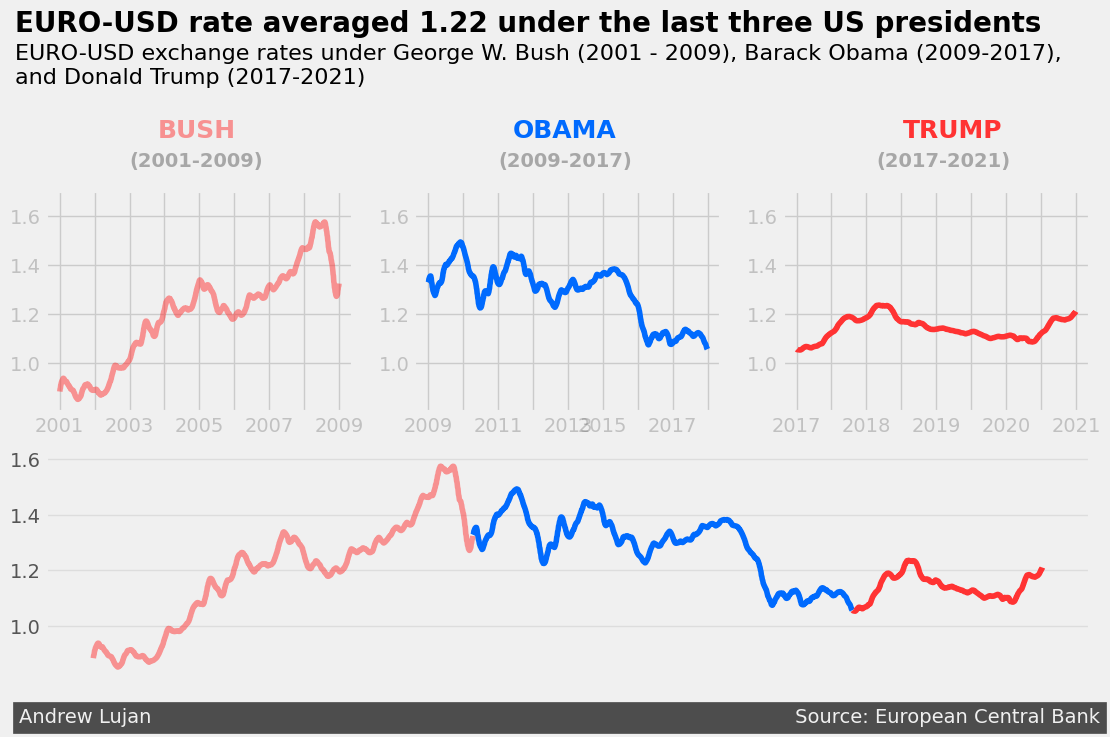

In [173]:
# Add the FiveThirtyEightStyle
style.use('fivethirtyeight')

# Adding subplots
plt.figure(figsize= (12, 6))
ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 1, 2)
axes = [ax1, ax2, ax3, ax3]

# Make changes to all subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2', '1.4', '1.6'],
                       alpha = .3)
# Ax1 = Bush
ax1.plot(bush['Time'], bush['rolling_mean'],
        color = '#FF3333', alpha = .5)
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '', '2007', '', '2009'],
                   alpha = .3)
ax1.text(731516.0, 1.92, 'BUSH', fontsize = 18, weight = "bold",
        color = '#FF3333', alpha = .5)
ax1.text(731216.0, 1.8, '(2001-2009)', weight='bold',
        alpha=0.3)

# Ax2 = Obama
ax2.plot(obama['Time'], obama['rolling_mean'],
        color = '#006AFE')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '2015', '', '2017'],
                   alpha = .3)
ax2.text(734288.0, 1.92, 'OBAMA', fontsize = 18, weight = 'bold',
        color = '#006AFE')
ax2.text(734138, 1.8, '(2009-2017)', weight = 'bold',
        alpha = .3)

# Ax3 = Trump
ax3.plot(trump['Time'], trump['rolling_mean'], 
        color = '#FF3333')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '', '2020', '', '2021'],
                   alpha = 0.3)
ax3.text(736885, 1.92 , 'TRUMP', fontsize = 18, color = '#FF3333', weight = 'bold')
ax3.text(736745.0, 1.8, '(2017-2021)', weight = 'bold',
        alpha = .3)

# Ax4 = Bush vs. Obama vs. Trump
ax4.plot(bush['Time'], bush['rolling_mean'],
        color = '#FF3333', alpha = .5)
ax4.plot(obama['Time'], obama['rolling_mean'],
        color = '#006AFE')
ax4.plot(trump['Time'], trump['rolling_mean'], 
        color = '#FF3333')
ax4.grid(alpha = .5)
ax4.set_xticks([])

# Adding titles and subtitles
ax1.text(730016.0, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=20, weight='bold')
ax1.text(730016.0, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''',
        fontsize=16)

# Adding a signature
### Adding a signature
ax4.text(729916.0, 0.65, 'Andrew Lujan' + ' '*103 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

plt.show()

### Conclusions

- From what we can see, the most growth happened during George Bush's tenure.
- Obama's tenure started 